# Задание 2

### 2. Случайная величина имеет экспоненциальный закон распределения


\begin{equation*} 
p(x) =
\begin{cases} 
e^{-x}, & \text{если } x \geq 0, \\
0, & \text{если } x < 0.
\end{cases}
\end{equation*}

In [1]:
import seaborn as sns
import numpy as np
import random as rd
import matplotlib.pyplot as polt
from scipy.stats import norm
import math

#### a)
Сгенерируйте выборку объема \( n = 25 \).  
Определить по выборке:
- моду,  
- медиану,  
- размах,  
- оценку коэффициента асимметрии.

In [2]:
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

def F_inv(y: float) -> float:
    return -np.log(1 - y)

# Размер выборки
N = 25
arr = []

for _ in range(N):
    y = rd.random()
    arr.append(F_inv(y))

In [3]:
variation_row = sorted(arr)

moda = arr[max([(arr.count(arr[i]),i) for i in range(N)])[1]]
print('Мода: ', moda)

print('Медиана: ', np.median(arr))

print('Размах: ', np.ptp(arr))

def Mu3(arr: list) -> float:
    mean = np.mean(arr)
    mu3 = 0.
    for i in range(len(arr)):
        mu3+=(arr[i]-mean)**3
    mu3 /= len(arr)
    return mu3

gamma = Mu3(arr) / np.std(arr)**3
 
print('Оценка коэффициента ассиметрии: ', gamma)

Мода:  0.013816872752237317
Медиана:  0.5022844121392096
Размах:  4.035752296358046
Оценка коэффициента ассиметрии:  1.5285445527477826


#### b)
Построить:
- эмпирическую функцию распределения,  
- гистограмму,  
- boxplot.

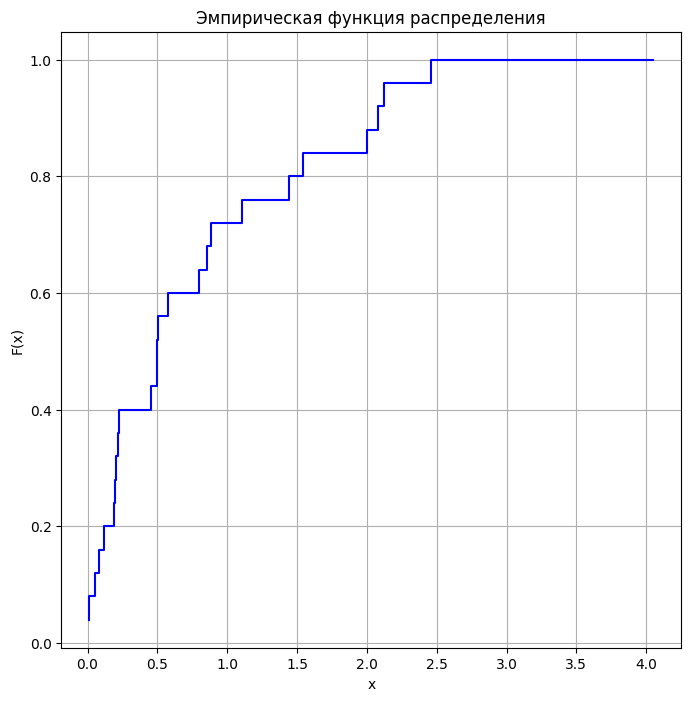

In [4]:
# Эмпирическая функция распределения
x_vals = np.sort(arr)
y_vals = np.arange(1, N + 1) / N

polt.figure(figsize=(8, 8))
polt.step(x_vals, y_vals, color="b")
polt.xlabel("x")
polt.ylabel("F(x)")
polt.title("Эмпирическая функция распределения")
polt.grid(True)

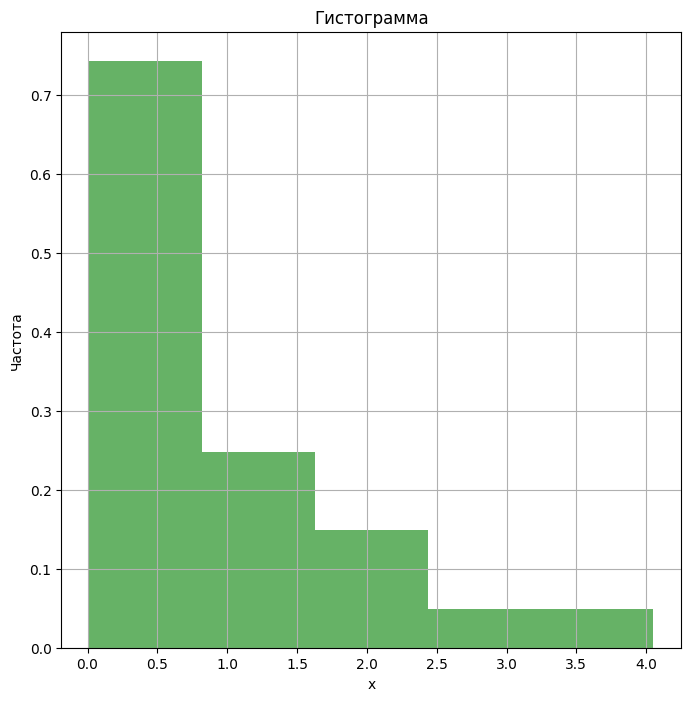

In [5]:
# Гистограмма
polt.figure(figsize=(8, 8))
polt.hist(arr, bins=1+int(np.log2(N)), alpha=0.6, color='g', density=True)
polt.xlabel('x')
polt.ylabel('Частота')
polt.title('Гистограмма')
polt.grid(True)

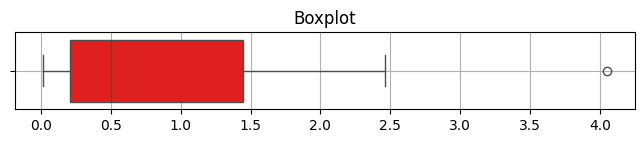

In [6]:
# Boxplot
polt.figure(figsize=(8, 1))
sns.boxplot(x=arr, color="r")
polt.title("Boxplot")
polt.grid(True)

#### c)
Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью центральной предельной теоремы (ЦПТ), с бутстраповой оценкой этой плотности.

### Центральная предельная теорема (ЦПТ)

$$
\mathbb{M}[\xi] = \int_{-\infty}^{\infty} x f(x) \,dx = \int_{0}^{\infty} x e^{-x} \,dx = 1
$$

$$
\mathbb{M}[\xi^2] = \int_{-\infty}^{\infty} x^2 f(x) \,dx = \int_{0}^{\infty} x^2 e^{-x} \,dx = 2
$$

$$
\mathbb{D}[\xi] = \mathbb{M}[\xi^2] - \mathbb{M}[\xi]^2 = 2 - 1^2 = 1
$$

$$
\frac{\overline{x} - \mathbb{M}[\xi]}{ \sqrt{\mathbb{D}[\xi]}} \sqrt{n} \longmapsto N(0, 1)
$$

$$
\frac{\overline{x} - 1}{ \sqrt{1}}  \sqrt{25} \longmapsto N(0, 1)
$$
$$
\overline{x} \longmapsto N(1, (1/5)^2)
$$

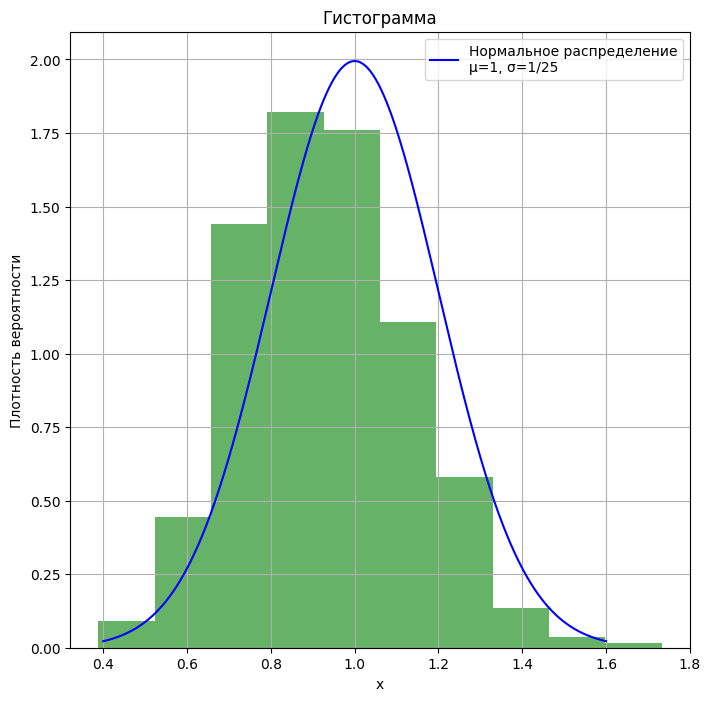

In [7]:
# Количество повторений бутстрапа
n_iterations = 1000

bootstrap_means = []

for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr))
    bootstrap_means.append(np.mean(sample))

# Параметры нормального распределения
mu = 1
sigma = 1/5 # корень из 1/25

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

polt.figure(figsize=(8, 8))
polt.hist(bootstrap_means, bins=1+int(np.log2(n_iterations)), alpha=0.6, color='g', density=True)
polt.plot(x, y, label="Нормальное распределение\nμ=1, σ=1/25", color='blue')
polt.xlabel('x')
polt.ylabel('Плотность вероятности')
polt.title('Гистограмма')
polt.grid(True)
polt.legend()
polt.show()

#### d)
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1.

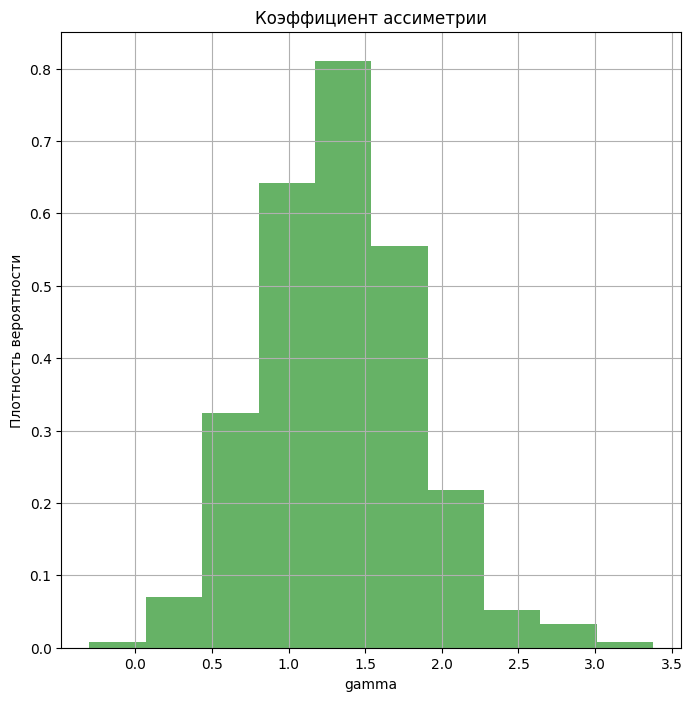

In [8]:
bootstrap_asymm = []

for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr))
    bootstrap_asymm.append(Mu3(sample)/(np.std(sample))**3)

polt.figure(figsize=(8, 8))
polt.hist(bootstrap_asymm, bins=1+int(np.log2(n_iterations)), alpha=0.6, color='g', density=True)
polt.xlabel('gamma')
polt.ylabel('Плотность вероятности')
polt.title('Коэффициент ассиметрии')
polt.grid(True)
polt.show()

In [9]:
m = np.sum([1 if bootstrap_asymm[i] < 1 else 0 for i in range(n_iterations)])

print("Оценка вероятности того, что коэффициент ассимеетрии меньше 1:", m/n_iterations)

Оценка вероятности того, что коэффициент ассимеетрии меньше 1: 0.25


#### e)
Сравнить плотность распределения медианы выборки с бутстраповой оценкой этой плотности.

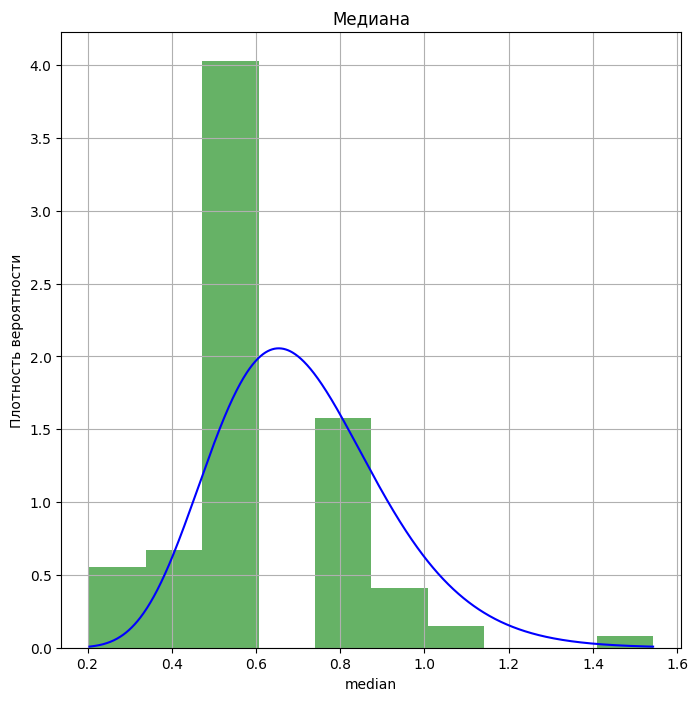

In [10]:
bootstrap_medians = []

for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr))
    bootstrap_medians.append(np.median(sample))



x = np.linspace(min(bootstrap_medians), max(bootstrap_medians), 1000)
y = [N * p(z) * math.comb(N - 1, N // 2) * (1 - F(z))**(N - N // 2 - 1) * F(z)**(N // 2) for z in x]


polt.figure(figsize=(8, 8))
polt.hist(bootstrap_medians, bins=1+int(np.log2(n_iterations)), alpha=0.6, color='g', density=True)
polt.plot(x, y, label="Распределение медианы", color='blue')
polt.xlabel('median')
polt.ylabel('Плотность вероятности')
polt.title('Медиана')
polt.grid(True)
polt.show()